In [2]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import random
import pandas as pd

sns.set(style="whitegrid")
seed = 0

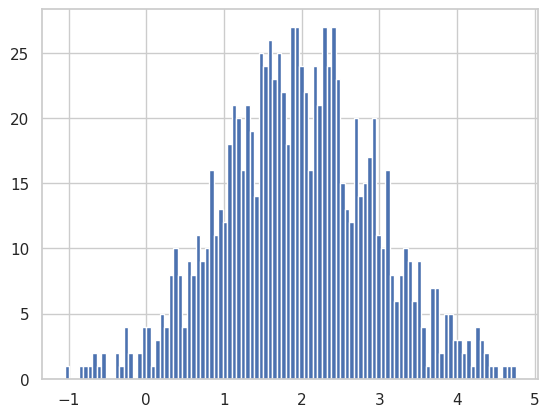

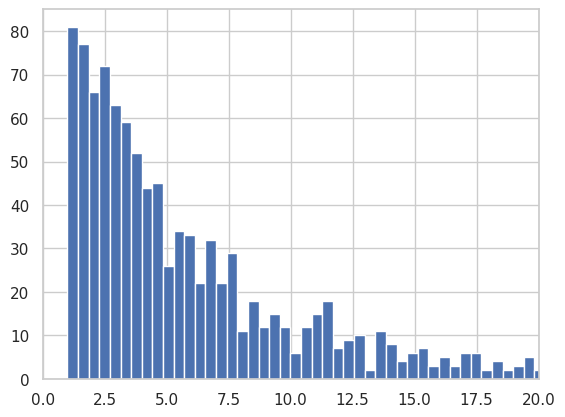

In [11]:
# Generate samples from a number of distributions.
# There is R distinct resources, each generating from the normal process.
# Parameters of the normal distribution differ between R's, but remain
# constant for a given R.
# The number M of available samples per R varies as well, and is drawn
# from gamma distribution.
# Total number of samples drawn is N.

plt.hist(stats.norm.rvs(size=1000, loc=2, scale=1, random_state=seed), bins=100)
plt.show()

plt.hist(stats.gamma.rvs(size=1000, a=1, loc=1, scale=5, random_state=seed), bins=100)
plt.xlim(0,20)
plt.show()


In [21]:
class Resource:
    def __init__(self, id, loc, scale, m, seed):
        self.id = id
        self.loc = loc
        self.scale = scale
        self.m = m
        self.seed = seed

    def generate(self):
        self.seed += 1
        return stats.norm.rvs(size=self.m, loc=self.loc, scale=self.scale, random_state=self.seed)

class Generator:
    def __init__(
        self,
        seed=0,
        r=1000,
        r_loc=(-5,2),
        r_scale=(0.1,1),
        m_a=1,
        m_loc=1,
        m_scale=3
    ):
        random.seed(seed)
        ms = stats.gamma.rvs(size=r, a=m_a, loc=m_loc, scale=m_scale, random_state=seed)
        print(ms)
        self.resources = []
        for r in range(0, r, 1):
            self.resources.append(
                Resource(
                    id='/%s' % r,
                    loc=random.uniform(*r_loc),
                    scale=random.uniform(*r_scale),
                    m=round(ms[r]),
                    seed=seed
                    )
                )

    def generate(
        self,
        n=100000,
    ):
        collected = []
        count = 0
        while count<n:
            for resource in self.resources:
                if count>n:
                    break
                
                gen = resource.generate()
                count += len(gen)
                for g in gen:
                    collected.append([resource.id, g])

        return collected

[ 3.38762352  4.76779229  3.76966944  3.36160346  2.65314547  4.11447788
  2.7265576   7.67057324 10.94473655  2.4508063   5.70668842  3.25802233
  3.51829854  8.79476246  1.22105606  1.27348309  1.06127676  6.36246304
  5.5173527   7.12094284]


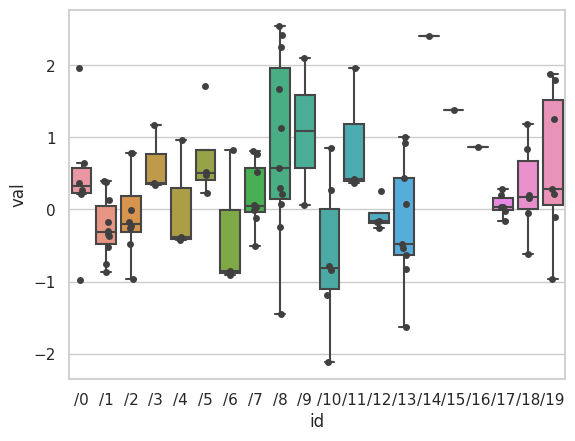

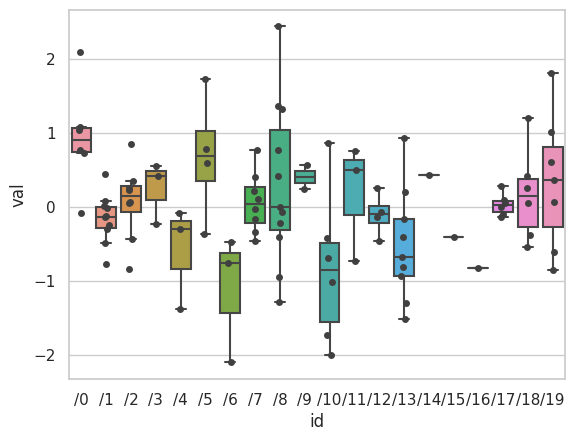

In [24]:
g = Generator(seed=0, r=20, r_loc=(-1,1), r_scale=(0.1,1.0), m_a=1, m_scale=3)

d = pd.DataFrame(g.generate(n=100), columns=['id', 'val'])
ax = sns.boxplot(x="id", y="val", data=d, showfliers = False)
ax = sns.stripplot(x='id', y='val', data=d, color=".25")
plt.show()

d = pd.DataFrame(g.generate(n=100), columns=['id', 'val'])
ax = sns.boxplot(x="id", y="val", data=d, showfliers = False)
ax = sns.stripplot(x='id', y='val', data=d, color=".25")
plt.show()
